This notebook is based upon https://www.geeksforgeeks.org/monte-carlo-integration-in-python/

In Monte Carlo methods random numbers are used to compute integals using the following idea:

$<f(x)>\equiv\frac{1}{b-a}\int^b_a f(x) dx$

$<f(x)>({b-a})=\int^b_a f(x) dx$

but $<f(x)>\approx\frac{1}{N}\Sigma_{i=1}^N f(x_i)$

and therefore $(b-a) \frac{1}{N}\Sigma_{i=1}^N f(x_i) \approx \int^b_a f(x) dx$

where N is the number of points where the function is computed and that will be selected randomly in the interval $[a,b]$.


Let us use this method to compute $\int_0^\pi sin(x) dx = 2$

(note that Monte Carlo methods are typically more useful when doing integrals in 2 or more dimensions since one can get an accurate solution with fewer points and hence a lower computational cost than other numerical methods)

In [1]:
import numpy as np

# limits of integration
a = 0
b = np.pi # gets the value of pi
N = 1000 #number of points for the integration (the larger the better)

# array of zeros of length N
ar = np.zeros(N)

# iterating over each value of ar and filling
# it with a random value between the limits a
# and b
for i in range (len(ar)):
    ar[i] = np.random.uniform(a,b)

# variable to store sum of the functions of
# different values of x
integral = 0.0

# function to calculate the sin of a particular
# value of x
def f(x):
    return np.sin(x)

# iterates and sums up values of different functions
# of x
for i in ar:
    integral += f(i)

# we get the answer by the formula derived adobe
ans = (b-a)/N*integral

# prints the solution
print (f'The value calculated by monte carlo integration is {ans}.')


The value calculated by monte carlo integration is 2.0123224792115284.


In [2]:
?np.random

We can also have a look at the value obtained for the integral when changing $N$. This will give us a visual representation of the most probable result.

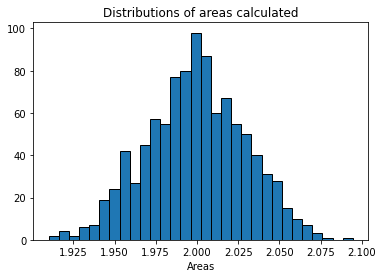

In [3]:
import matplotlib.pyplot as plt

# list to store all the values for plotting
plt_vals = []

# we iterate through all the values to generate
# multiple results and show whose intensity is
# the most.
for i in range(N):

    #array of zeros of length N
    ar = np.zeros(N)

    # iterating over each Value of ar and filling it
    # with a randome value between the limits a and b
    for i in range (len(ar)):
        ar[i] = np.random.uniform(a,b)

    # variable to store sum of the functions of different
    # values of x
    integral = 0.0

    # iterates and sums up values of different functions
    # of x
    for i in ar:
        integral += f(i)

    # we get the answer by the formula derived adobe
    ans = (b-a)/float(N)*integral

    # appends the solution to a list for plotting the graph
    plt_vals.append(ans)

# details of the plot to be generated
# sets the title of the plot
plt.title("Distributions of areas calculated")

# 3 parameters (array on which histogram needs
# to be made, bins, separators colour between the
# beams)
plt.hist (plt_vals, bins=30, ec="black")

# sets the label of the x-axis of the plot
plt.xlabel("Areas")
plt.show() # shows the plot


From scipy we can also load the integrate module to compute the integral in a different way using scipy.integrate https://docs.scipy.org/doc/scipy/reference/reference/integrate.html#module-scipy.integrate

In [4]:
import scipy.integrate as integrate

In [5]:
?integrate

In [6]:
result = integrate.quad(f, a, b)
print(result)

(2.0, 2.220446049250313e-14)


We can also compute the integral analytically using sympy
https://www.sympy.org/en/index.html

In [7]:
import sympy

In [8]:
?sympy

In [9]:
z = sympy.symbols('z')
sympy.integrate(sympy.sin(z), (z,a,b))

2.00000000000000